## In this notebook

- Vizualize unbeaten teams.

In [1]:
import datetime
import json

from pathlib import Path

# analytics
import pandas as pd
pd.set_option("display.max_rows", 100)
pd.set_option("display.max_columns", 100)
import numpy as np

# plot
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns
# sns.set()

# other
import requests

In [2]:
DATA_FOLDER = Path("/usr/src/app/data/")

URL_STANDINGS = "https://api-web.nhle.com/v1/standings/now"

## Download data

In [3]:
# get standings from NHL API

response = requests.get(URL_STANDINGS)

if response.ok:
    standings = json.loads(response.text).get("standings")
    print("✅ Standings loaded successfully!")

else:
    print("❌ Error: Standings were NOT loaded!")

✅ Standings loaded successfully!


In [4]:
df = (
    pd
    .DataFrame([
        {
            "team": standing.get("teamName").get("default"),
            "team_abbrev": standing.get("teamAbbrev").get("default"),
            "conference": standing.get("conferenceAbbrev"),
            "games": standing.get("gamesPlayed"),
            "wins": standing.get("wins"),
            "losses": standing.get("losses"),
            "losses_ot": standing.get("otLosses"),
            "season": standing.get("seasonId"),
            # "logo_url": standing.get("teamLogo"),
        }
        for standing in standings
    ])
    .sort_values(by=["conference", "team"])
    .reset_index(drop=True)
)

df["logo_path"] = df.team_abbrev.apply(lambda x: f"/usr/src/app/data/v1/logos/PNG/{x}.svg.png")

df

,team,team_abbrev,conference,games,wins,losses,losses_ot,season,logo_path
0,Boston Bruins,BOS,E,19,14,2,3,20232024,/usr/src/app/data/v1/logos/PNG/BOS.svg.png
1,Buffalo Sabres,BUF,E,20,9,9,2,20232024,/usr/src/app/data/v1/logos/PNG/BUF.svg.png
2,Carolina Hurricanes,CAR,E,19,11,8,0,20232024,/usr/src/app/data/v1/logos/PNG/CAR.svg.png
3,Columbus Blue Jackets,CBJ,E,21,6,11,4,20232024,/usr/src/app/data/v1/logos/PNG/CBJ.svg.png
4,Detroit Red Wings,DET,E,19,10,6,3,20232024,/usr/src/app/data/v1/logos/PNG/DET.svg.png
5,Florida Panthers,FLA,E,20,12,7,1,20232024,/usr/src/app/data/v1/logos/PNG/FLA.svg.png
6,Montréal Canadiens,MTL,E,20,9,9,2,20232024,/usr/src/app/data/v1/logos/PNG/MTL.svg.png
7,New Jersey Devils,NJD,E,18,8,9,1,20232024,/usr/src/app/data/v1/logos/PNG/NJD.svg.png
8,New York Islanders,NYI,E,19,8,6,5,20232024,/usr/src/app/data/v1/logos/PNG/NYI.svg.png
9,New York Rangers,NYR,E,18,14,3,1,20232024,/usr/src/app/data/v1/logos/PNG/NYR.svg.png


## Show teams

In [5]:
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import matplotlib.cm as cm

from matplotlib.patches import FancyBboxPatch
from PIL import Image

In [6]:
def plot_teams_by_conference(conference: str):

    image_files = df.loc[df.conference == conference].to_dict("records")

    # create a 4x4 grid of subplots and display the images
    fig, axes = plt.subplots(4, 4, figsize=(10, 10))
    fig.suptitle(
        "NHL Eastern Conference" if conference == "E" else "NHL Western Conference", 
        fontsize=24, 
        fontweight=50,
    )

    for i, ax in enumerate(axes.flat):
        losses_total = image_files[i].get("losses") + image_files[i].get("losses_ot")
        alpha = 0.5 if losses_total > 0 else 1

        ax.axis("off")
        ax.set_xlabel(image_files[i].get("team"))

        p_bbox = FancyBboxPatch(
            (0, 0), 1, 1,
            boxstyle="round,pad=-0.0040,rounding_size=0.1",
            alpha=alpha,
            edgecolor="white",
            facecolor="silver",
            fill=losses_total > 0,
            # clip_on=False, 
            # lw=1,
            # mutation_aspect=1,
            transform=ax.transAxes,
        )
        ax.add_patch(p_bbox)

        # load logo and convert image to grey scale, if team has already lost at least one game
        image = Image.open(image_files[i].get("logo_path"))
        if losses_total > 0: 
            image = image.convert("L")
        ax.imshow(np.array(image), alpha=alpha, cmap=cm.Greys_r)
        
        # set up title for every team
        # ax.set_title(image_files[i].get("team").upper(), fontsize=8)

    # adjust spacing between subplots for better layout
    plt.tight_layout()
    plt.show()

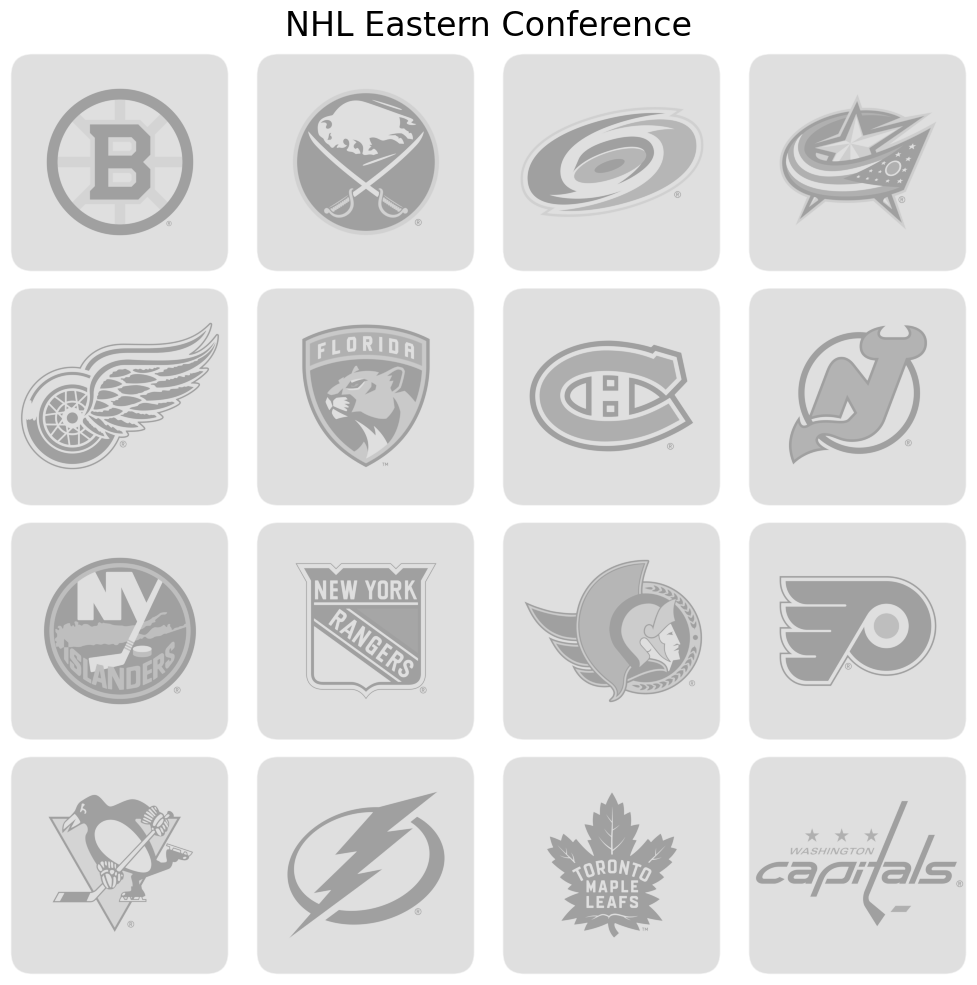

In [7]:
plot_teams_by_conference(conference="E")

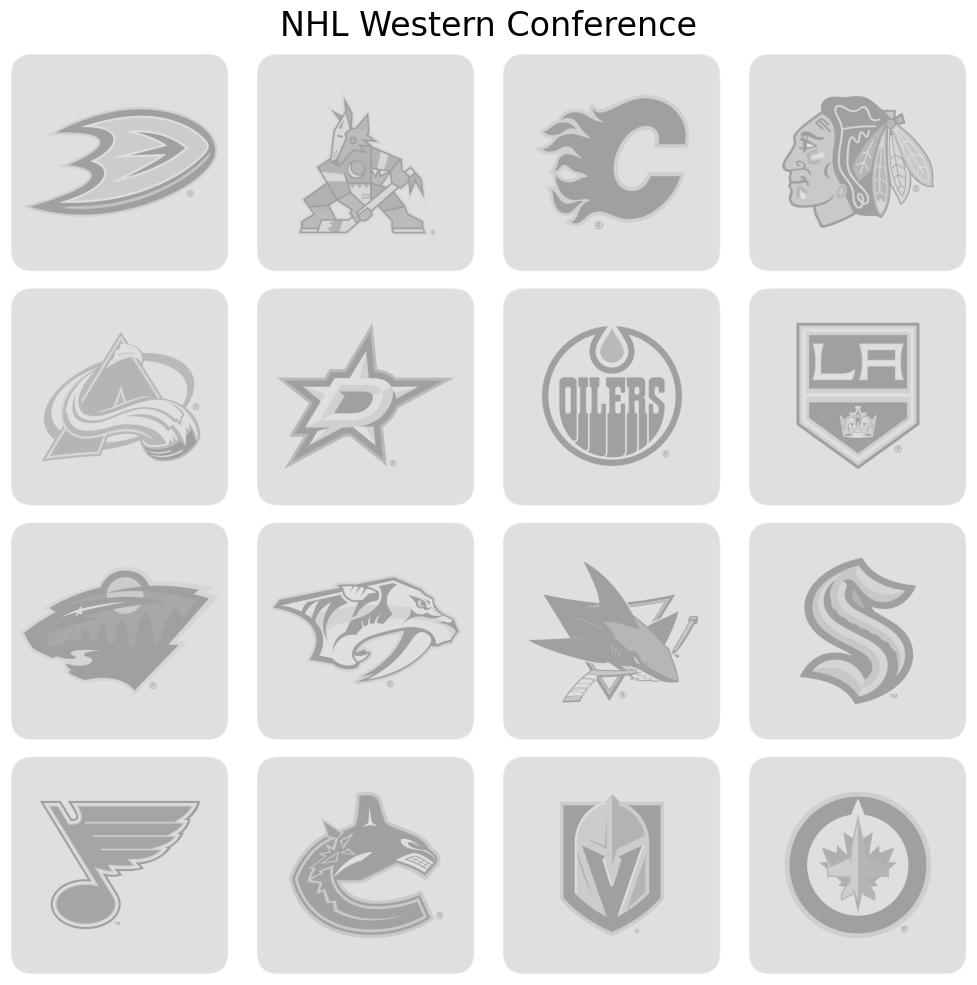

In [8]:
plot_teams_by_conference(conference="W")